# Курсовая работа

    Основная задача анализ датасета с фильмами, выяснить зависимость получения выручки за фильм от рейтинга фильма. 
    Также визуализировать имеющиеся данные в датасете. 

### Импортируем бибилотеки

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
sea.set(style="darkgrid")

Прочитаем файл Movie.csv и сохраним его в переменной df.

In [2]:
df = pd.read_csv('Movie.csv')

Посмотрим на наши данные

In [3]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Всего в таблице 11 столбцов

Подробно разберём, какие в df столбцы и какую информацию они содержат:

    Rank — Ранг;
    Title — Название фильма;
    Genre — Жанр;
    Description — Описание;
    Director — Режиссёр;
    Actors — Актёры;
    Year — Год выпуска;
    Runtime (Minutes)   — Длительность фильма в минутах;
    Rating — Рейтинг;
    Votes — Количество голосов;
    Revenue (Millions)  — Выручка фильма (в миллионах);
    Metascore — Баллы полученные фильмом.

Переименнуем столбцы таблицы для удобства дальнейшей работы. Проверим результат.

In [6]:
df.columns = ['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime_min', 'rating', 'votes', 'revenue_in_millions', 'metascore']

In [7]:
df.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime_min', 'rating', 'votes', 'revenue_in_millions', 'metascore'],
      dtype='object')

Проверим данные на наличие пропусков.

In [8]:
df.isnull().sum()

rank                     0
title                    0
genre                    0
description              0
director                 0
actors                   0
year                     0
runtime_min              0
rating                   0
votes                    0
revenue_in_millions    128
metascore               64
dtype: int64

Пустые значения свидетельствуют, что для некоторых фильмов доступна не вся информация. Причины могут быть разные. Самое худшее, если проблемы с записью данных. 

Уберем строки где имеются пропуски.

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 838 non-null    int64  
 1   title                838 non-null    object 
 2   genre                838 non-null    object 
 3   description          838 non-null    object 
 4   director             838 non-null    object 
 5   actors               838 non-null    object 
 6   year                 838 non-null    int64  
 7   runtime_min          838 non-null    int64  
 8   rating               838 non-null    float64
 9   votes                838 non-null    int64  
 10  revenue_in_millions  838 non-null    float64
 11  metascore            838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


Проверяем на наличие дупликатов. Если найдутся, удаляем.

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,rank,year,runtime_min,rating,votes,revenue_in_millions,metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


#### Средний рейтинг всего датасета составил 6.81 балла, дисперсия - 0.769, среднеквадратичное отклонение - 0.877

In [12]:
X = df.rating

print(f'Среднее арифметическое: {np.mean(X)}')
print(f'Среднее квадратичное отклонение: {np.std(X)}')
print(f'Дисперсия: {np.var(X)}')

Среднее арифметическое: 6.8143198090692145
Среднее квадратичное отклонение: 0.8772299659925482
Дисперсия: 0.7695324132352873


### Посмотрим взаимосвязь рейтинга фильма и Полученной выручки за фильм

In [13]:
def func(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

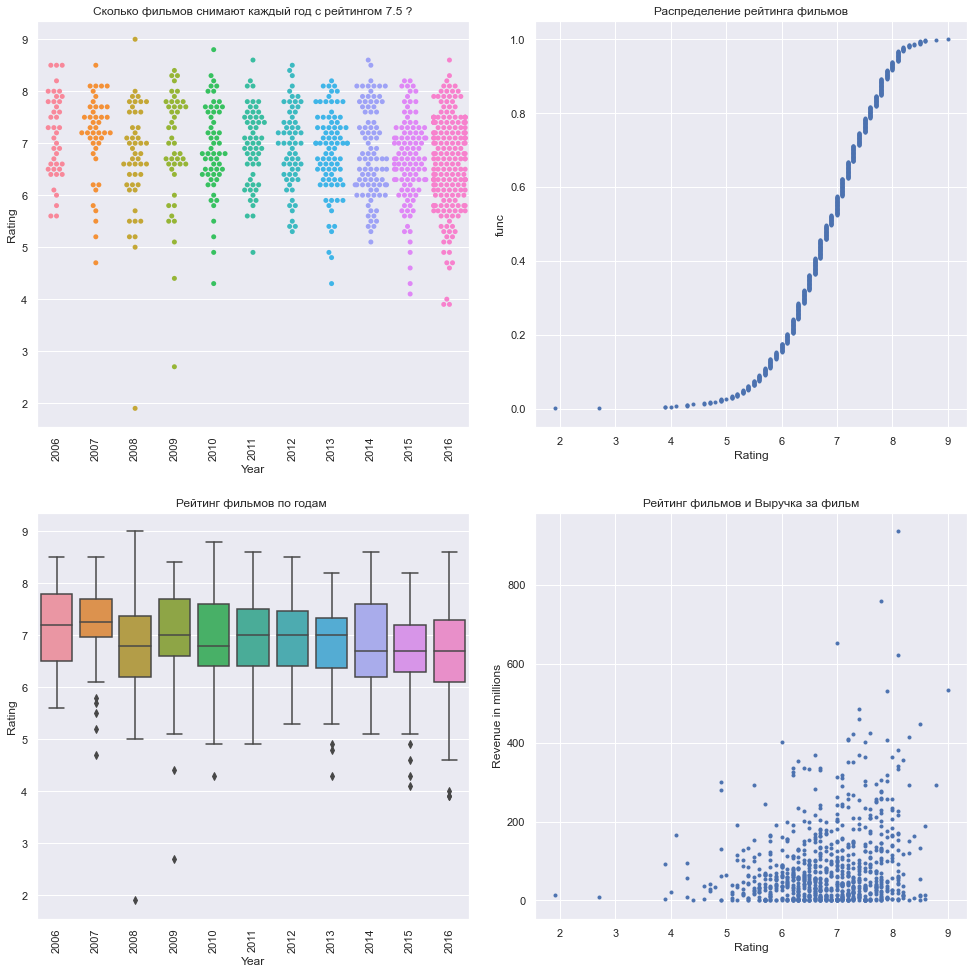

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# PLOT 1 
axes[0, 0].set_title('Сколько фильмов снимают каждый год с рейтингом 7.5 ?')
chart = sea.swarmplot(y='rating', x='year', data=df, ax=axes[0,0])
_ = axes[0, 0].set( ylabel='Rating', xlabel='Year')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


# PLOT 2 
axes[0, 1].set_title('Распределение рейтинга фильмов')
x_vers, y_vers = func(df.rating)
_ = axes[0, 1].plot(x_vers, y_vers, marker='.', linestyle='none')
_ = axes[0, 1].set(xlabel='Rating', ylabel='func')

# PLOT 3 
axes[1, 0].set_title('Рейтинг фильмов по годам ')
chart = sea.boxplot(x='year', y='rating', data=df,  ax=axes[1,0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
_ = axes[1, 0].set( ylabel='Rating', xlabel='Year')

# PLOT 4
axes[1, 1].set_title('Рейтинг фильмов и Выручка за фильм')
_ = axes[1, 1].plot(df.rating, df.revenue_in_millions, marker='.', linestyle='none')
_ = axes[1, 1].set( xlabel='Rating', ylabel='Revenue in millions')


plt.tight_layout(pad=2.0)
plt.show()

### Рассмотрим столбец с рейтингом фильмов. Построим его гистограмму и теоретическую функцию плотности соответствующего нормального распределения

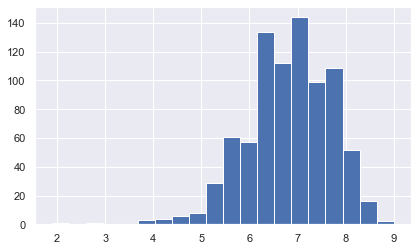

In [15]:
plt.hist(df['rating'], bins=20);

In [16]:
loc = df['rating'].mean()
scale = df['rating'].std(ddof=1)

loc, scale

(6.8143198090692145, 0.8777538418027501)

In [17]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

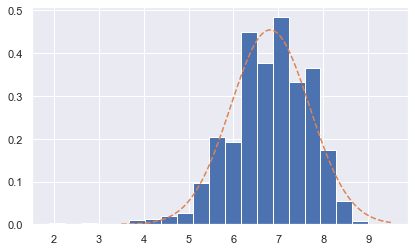

In [18]:
ox = np.linspace(3.5, 9.5, 100)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['rating'], density=True, bins=20)
plt.plot(ox, oy, linestyle='dashed')
plt.show()

Также построим эмпирическую и теоретическую функции распределения для роста.

In [19]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

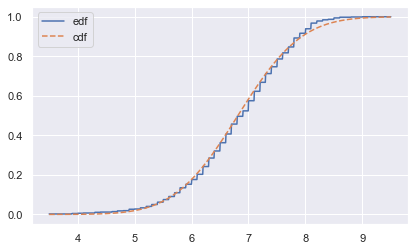

In [20]:
ox = np.linspace(3.5, 9.5, 1000)
oy1 = np.array([edf(df['rating'], x) for x in ox])
oy2 = stats.norm.cdf(ox, loc=loc, scale=scale)

plt.plot(ox, oy1, label='edf')
plt.plot(ox, oy2, linestyle='dashed', label='cdf')

plt.legend()

## Проведем корелляционный анализ

### Пирсон

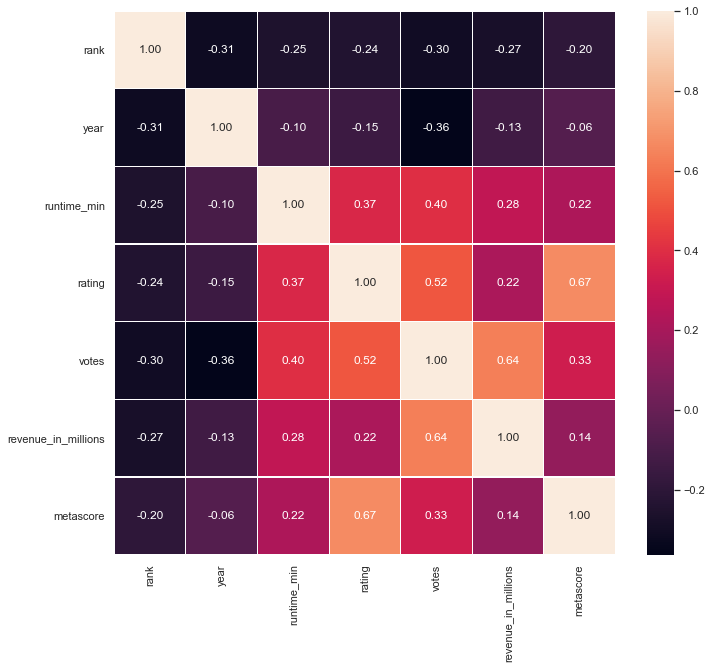

In [21]:
df_corr = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))
sea.heatmap(df_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show()

### Кендалл

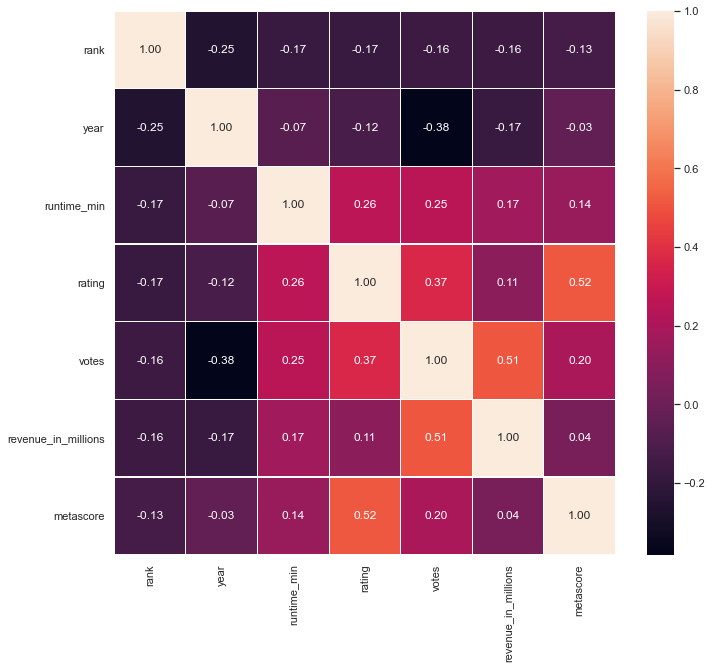

In [22]:
df_corr = df.corr(method='kendall')
f, ax = plt.subplots(figsize=(10, 10))
sea.heatmap(df_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show()

### Спирман

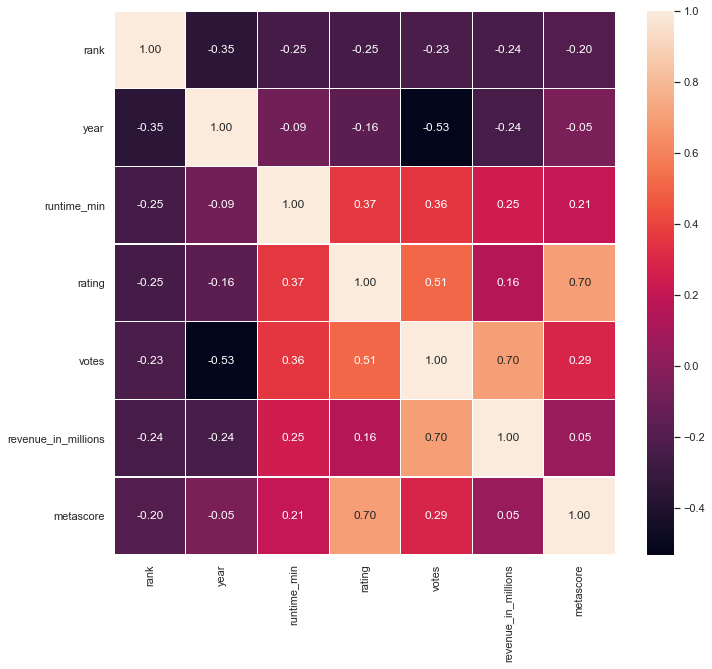

In [23]:
df_corr = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 10))
sea.heatmap(df_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show()

### Построим модель линейной регрессии

Рассмотрим данные со значениями рейтинга фильма (x1) и выручкой за фильм (y1). 

In [24]:
x1 = df['rating']
y1 = df['revenue_in_millions']

In [25]:
x1 = np.array(x1)
y1 = np.array(y1)

Найдём коэффициенты линейной регрессии:

In [26]:
b1 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0)
b1

25.852287759248938

In [27]:
b0 = y1.mean() - b1 * x1.mean()
b0

-91.60119811505385

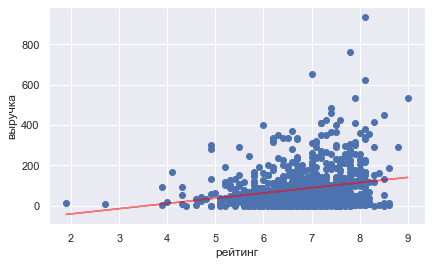

In [28]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('рейтинг')
plt.ylabel('выручка');

In [29]:
z1 = b0 + b1 * x1

np.vstack([y1, z1]).T[:5]

array([[333.13      , 117.80233273],
       [126.46      ,  89.3648162 ],
       [138.12      ,  97.12050253],
       [270.32      ,  94.53527375],
       [325.02      ,  68.68298599]])

In [30]:
R1 = 1 - (z1 - y1).var() / y1.var()
R1

0.04713491801764147

In [31]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.04713492],
       [0.04713492, 1.        ]])

Как мы видим, коэффициент детерминации оказался очень низок. Признаки, которые мы выбрали, объясняют лишь малый процент дисперсии. 
Можно сделать вывод, что выручка фильма собранная после проката слабо зависит от рейтинга фильма. 

In [32]:
top_rated = df.sort_values(["rating","metascore"], ascending=False)[
    ["title", "year", "rating","metascore", "revenue_in_millions"]]
top_rated.index = range(1,839)
top_rated.head(20)

,title,year,rating,metascore,revenue_in_millions
1,The Dark Knight,2008,9.0,82.0,533.32
2,Inception,2010,8.8,74.0,292.57
3,Kimi no na wa,2016,8.6,79.0,4.68
4,Interstellar,2014,8.6,74.0,187.99
5,The Intouchables,2011,8.6,57.0,13.18
6,The Lives of Others,2006,8.5,89.0,11.28
7,Whiplash,2014,8.5,88.0,13.09
8,The Departed,2006,8.5,85.0,132.37
9,The Dark Knight Rises,2012,8.5,78.0,448.13
10,The Prestige,2006,8.5,66.0,53.08


In [33]:
df.shape

(838, 12)

In [36]:
k1 = 12
k2 = 838
alpha = 0.05
F = (R1 / k1) / ((1 - R1) / k2)
F

3.4544118614541035

In [38]:
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

1.763720103885306

In [39]:
F > F_crit

True